In [92]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import json
from datetime import date
import numpy as np
import matplotlib.pyplot as plt

# 爬取證券交易所的股價資料
def fetch_stock_data_exchange(stock_code):
  d = date.today().strftime("%Y%m%d")
  url = f'https://www.twse.com.tw/rwd/zh/afterTrading/STOCK_DAY?date={d}&stockNo={stock_code}&response=json'  # 替換為實際證券交易所的 URL
  response = requests.get(url)
  x = json.loads(response.text)

  # x_l = np.linspace(150, 300, 100)
  d = ([float(i[6]) for i in x['data']])
  y_l = ([i[0] for i in x['data']])
  # y_l = range(len(d))
  fig = plt.figure()
  ax = fig.add_subplot(111)
  plt.plot(y_l, d, color='blue', linewidth=2, marker='o')

  plt.show()

  return {
    "fields": x['fields'],
    "data": x['data']
  }


In [78]:
import yfinance as yf
import matplotlib.pyplot as plt

def fetch_stock_data_yahoo(stock_code):
  # import re
  # url = f"https://tw.quote.finance.yahoo.net/quote/q?type=ta&perd=d&mkt=10&sym={stock_code}&v=1&callback=jQuery111302872649618000682_1649814120914&_=1649814120915"
  # headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/111.25 (KHTML, like Gecko) Chrome/99.0.2345.81 Safari/123.36'}
  # res = requests.get(url,headers=headers)

  # # 最新價格
  # current = [l for l in res.text.split('{') if len(l)>=60][-1]
  # current = current.replace('"','').split(',')
  # # 昨日價格
  # yday = float(re.search(':.*',[l for l in res.text.split('{') if len(l)>=60][-2].split(',')[4]).group()[1:])

  # df = pd.DataFrame({
  #     'open':float(re.search(':.*',current[1]).group()[1:]),
  #     'high':float(re.search(':.*',current[2]).group()[1:]),
  #     'low':float(re.search(':.*',current[3]).group()[1:]),
  #     'close':float(re.search(':.*',current[4]).group()[1:]),
  #     'volume':float(re.search(':.*',current[5].replace('}]','')).group()[1:]),
  #     'pct':round((float(re.search(':.*',current[4]).group()[1:])/yday-1)*100,2)
  # },index=[stock_code])
  data = yf.download(f"{stock_code}.TW")
  # print(data)
  data.plot(subplots=True, figsize=(10, 8))
  plt.legend(loc='best')
  plt.show()

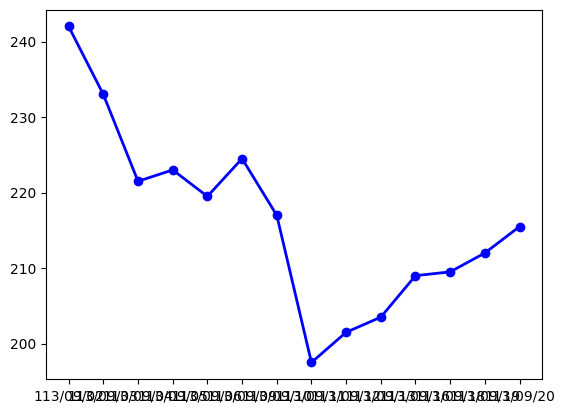

Exchange Price for 6139: 215.50


[*********************100%***********************]  1 of 1 completed


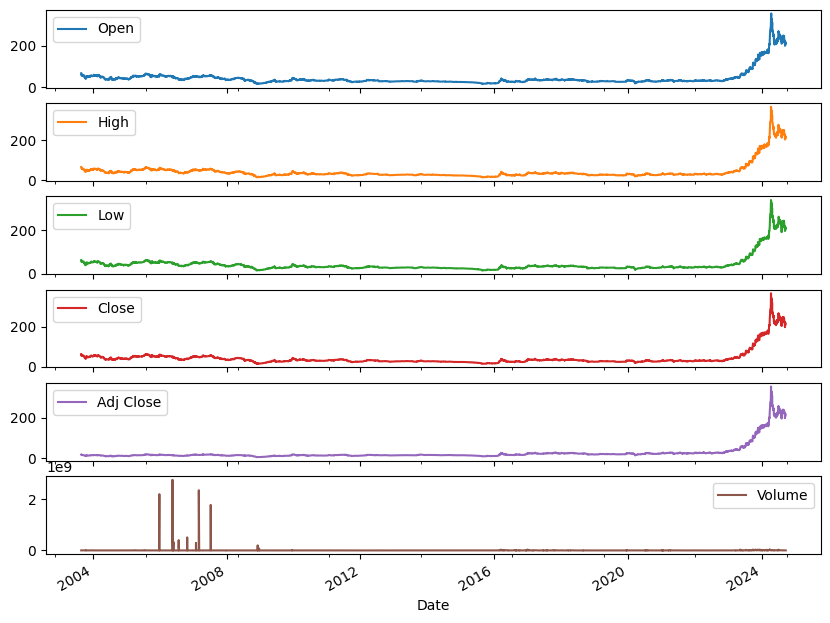

Yahoo Price for 6139: None


In [93]:
stock_code = '6139'  # 替換為實際的股號
data = fetch_stock_data_exchange(stock_code)
# print(data)
print(f'Exchange Price for {stock_code}: {data["data"][-1][6]}')

yahoo_price = fetch_stock_data_yahoo(stock_code)
print(f'Yahoo Price for {stock_code}: {yahoo_price}')